<a href="https://colab.research.google.com/github/ravi-0309/Dynamic-Response/blob/main/Free_Undamped_Vibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

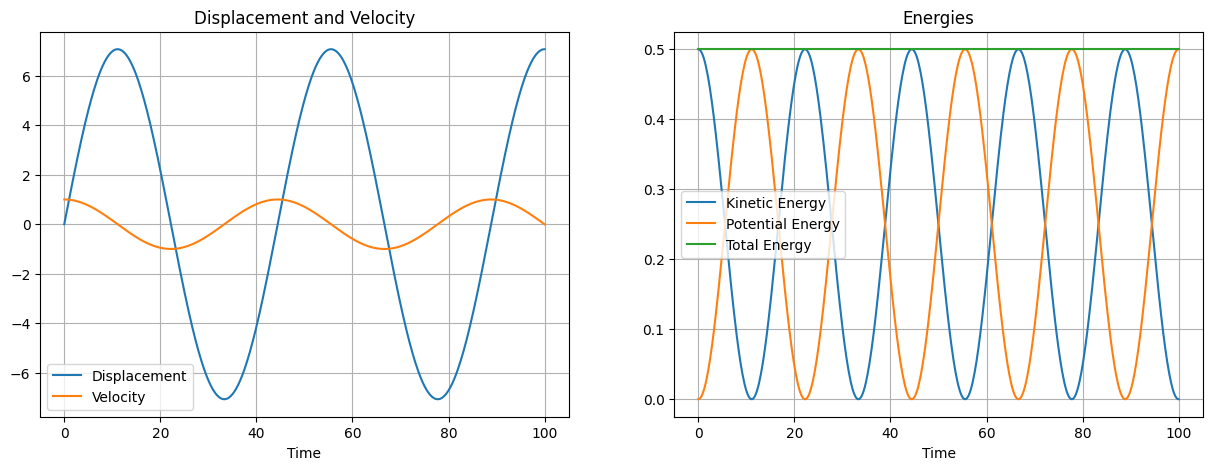

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Inputs
m = 1.0
k = 0.02
u_0 = 0
u_dot_0 = 1.0

ω_n = np.sqrt(k/m) # natural Frequency
A = u_0
B = u_dot_0 / ω_n

# Generating time array
t = np.linspace(0, 100, 500)

# Displacement and Velocity Functions
u = A * np.cos(ω_n * t) + B * np.sin(ω_n * t)
u_dot = B * ω_n * np.cos(ω_n * t) - A * ω_n * np.sin(ω_n * t)

# Energy Functions
KE = 0.5 * m * u_dot**2
PE = 0.5 * k * u**2
TE = KE + PE

# Plotting Displacement and Velocity
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(t, u, label="Displacement")
ax[0].plot(t, u_dot, label="Velocity")
ax[0].set_xlabel('Time')
ax[0].set_title('Displacement and Velocity')
ax[0].grid(True)
ax[0].legend()

# Plotting Energies
ax[1].plot(t, KE, label="Kinetic Energy")
ax[1].plot(t, PE, label="Potential Energy")
ax[1].plot(t, TE, label="Total Energy")
ax[1].set_xlabel('Time')
ax[1].set_title('Energies')
ax[1].grid(True)
ax[1].legend()

plt.show()